# Set up enviroment

In this lab and the subsequent labs, we will use Jupyter Notebook. To run code in Jupyter Notebook, the notebook requires a kernel, which interacts with the code you write and provides the execution environment. 

You should create a virtual environment and select it as your notebook kernel. Using a virtual environment is crucial for managing dependencies and maintaining project isolation in Python development.

We can create virtual enviroment using `venv` from python or using `Minicona/Anaconda`.

## Virtual enviroment using python

If you choose this method, make sure that Python is already installed on your system.

1. Create a Virtual Python Environment

    Create a virtual environment named `myenv`.
    ```bash
    python3 -m venv myenv
    ```

2. Active/Deactive your virtual enviroment

    To start using your new environment, activate it with:
    
    - Windown: 

        ```bash
        myenv\Scripts\activate
        ```
    - macOS/Linux:
    
        ```bash
        source myenv/bin/activate
        ```

    When you are done using the virtual environment, you can deactivate it by simply typing:
    
    ```bash
    deactivate
    ```
3. Install packages

    To install packages in your virtual environment, make sure it is activated first, then run:

    ```bash
    pip install package-name
    ```

    For example:
    ```bash
    pip install numpy
    ```


## Miniconda/Anaconda
Miniconda/Anaconda provides a platform for managing Python packages, creating isolated environments, and simplifying the setup of a data science and machine learning workflow. You need to make sure that Miniconda/Anaconda already be installed on your system befor start.

1. Create a New Conda Environment

    Use the `conda create` command followed by `--name` to specify the name of the environment and optionally specify the Python version.

    ```bash
    conda create --name myenv python=3.10
    ```
    This command will create a new Conda environment named `myenv` and install `Python 3.10` in that environment. 

2. Activate/Deactive the Environment

    To start using your new environment, activate it with:

    ```bash
    conda activate myenv
    ```

    When you’re done working in the environment, you can deactivate it with:

    ```bash
    conda deactivate
    ```

3. Install Packages

    Once the environment is activated, you can install packages using conda install or pip. For example:

    ```bash
    conda install numpy package-name
    ```

## Select kernel

When you have successfully created your virtual environment, you can choose it as the notebook kernel. In Jupyter Notebook (or in VSCode with Jupyter integration), use the `Select Kernel` option located at the top right of the notebook interface to select your environment.

In this lab, we will use `venv` from python.

# Install library

You can install each package sequentially by activating your `venv` and running:

```bash
pip install package-name
```

Alternatively, you can list all the packages you need in a file, usually named `requirements.txt`, and install them all at once by running:
```bash
pip install -r requirements.txt
```

Here is the list of packages required for this lab, which should be included in the `requirements.txt` file:
```
ipykernel-6.29.5
librosa-0.10.2.post1
matplotlib-3.9.1.post1
```
This version includes the proper `==` operator for specifying exact package versions and clarifies the usage of `requirements.txt`.

# File audio with Librosa

`librosa` is a powerful Python library for audio and music analysis. It provides tools for analyzing, processing, and visualizing audio signals, making it a popular choice among researchers and developers in the fields of music information retrieval and audio signal processing. 

Audios can be presented in different computer-readable formats such as:

- Wav (Waveform Audio File) format
- WMA (Windows Media Audio) format
- mp3 (MPEG-1 Audio Layer 3) format.

## Import Librosa

In [2]:
import librosa

## Loadfile

In [13]:
# %loading the audio with librosa
data, sampling_rate = librosa.load('./source.wav')

To listen the audio we have loaded with librosa, we typically use other libraries like `IPython.display` for playback. Here's an example:

In [ ]:
import IPython.display as ipd

# Load audio file
audio_path = './source.wav'
data, sampling_rate = librosa.load(audio_path)

# Play audio
ipd.Audio(data, rate=sampling_rate)

## Plot waveform

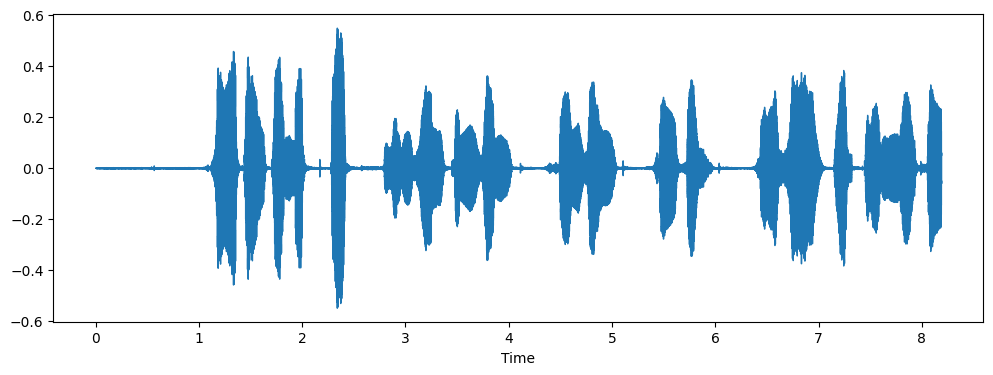

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

## Fast Fourier transform 

Text(0, 0.5, 'Amplitude')

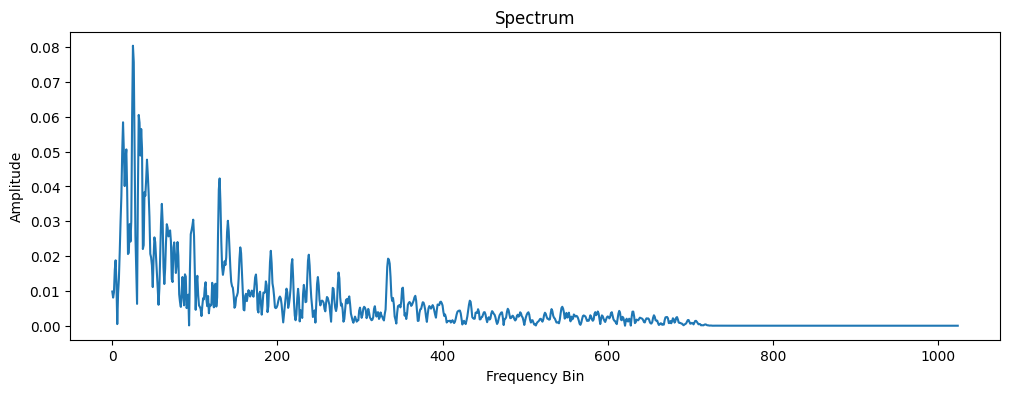

In [14]:
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

## Time-Frequency Representation

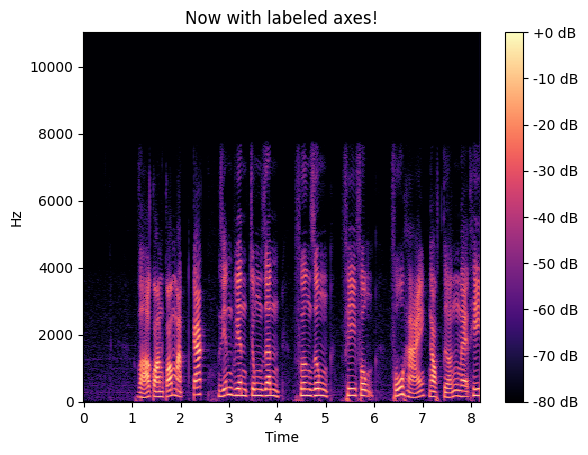

In [20]:
D = librosa.stft(data)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")

## Mel Frequency Cepstral Coefficients(MFCCs)

[Text(0.5, 1.0, 'MFCC')]

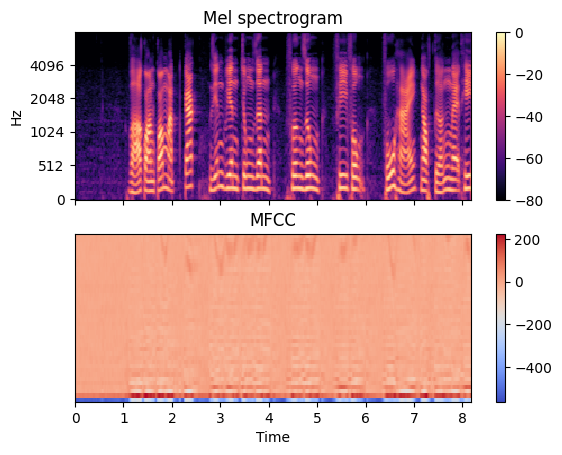

In [22]:
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128, fmax=8000)
fig, ax = plt.subplots(nrows=2, sharex=True)

img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])

fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')